In [ ]:
import numpy
import numpy as np
import torch
from torch import nn
import pandas as pd
from torch.utils.data import DataLoader
from torchvision import models, transforms
from doodleLoaderSimple import DoodleDatasetSimple
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Training and validation for the house image classifier

In [68]:
# Number to class labels mapping
class_dict = {
    0: 'Stress/Anxiety',
    1: 'Low self-esteem/Introvert/Withdrawn',
    2: 'High self-esteem/Extrovert/Fantasizing'
}

# Loading the data from the CSV file
data = np.genfromtxt('D:/COLLEGE_STUDIES/SEM-6/ML_NLP_project/data/houseData.csv', dtype=int, delimiter=',', names=True)

# Convert structured NumPy array to Pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())

# Convert class labels
df['class_label'] = df['class'].map(class_dict)
df.head()

   id  class
0   0      0
1   1      1
2   2      2
3   3      0
4   4      1


,id,class,class_label
0,0,0,Stress/Anxiety
1,1,1,Low self-esteem/Introvert/Withdrawn
2,2,2,High self-esteem/Extrovert/Fantasizing
3,3,0,Stress/Anxiety
4,4,1,Low self-esteem/Introvert/Withdrawn


In [69]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Convert numeric class labels to their corresponding category
df['class_label'] = df['class'].map(class_dict)

# Display cleaned data
print(df.head())


Missing values:
 id             0
class          0
class_label    3
dtype: int64

Duplicate rows: 540
   id  class                             class_label
0   0      0                          Stress/Anxiety
1   1      1     Low self-esteem/Introvert/Withdrawn
2   2      2  High self-esteem/Extrovert/Fantasizing
3   3      0                          Stress/Anxiety
4   4      1     Low self-esteem/Introvert/Withdrawn


C:\Users\karti\AppData\Local\Temp\ipykernel_20708\535043083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class_label', data=df, palette='viridis')


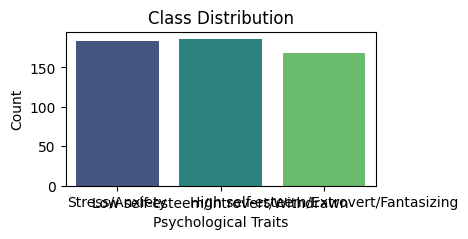

In [70]:
# Plot class distribution
plt.figure(figsize=(4, 2))
sns.countplot(x='class_label', data=df, palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Psychological Traits")
plt.ylabel("Count")
plt.show()


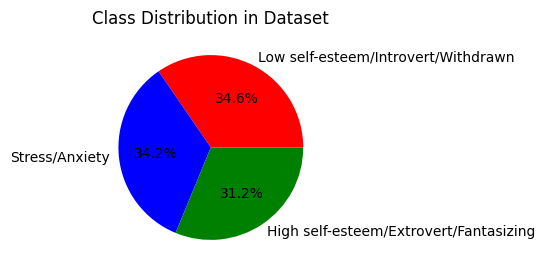

In [71]:
# Pie chart visualization
plt.figure(figsize=(3,3))
df['class_label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'blue', 'green'])
plt.title("Class Distribution in Dataset")
plt.ylabel("")
plt.show()


In [72]:
print("Class value counts:\n", df['class_label'].value_counts())
print("\nClass mean:\n", df['class'].mean())
print("\nClass median:\n", df['class'].median())
print("\nClass mode:\n", df['class'].mode()[0])


Class value counts:
 class_label
Low self-esteem/Introvert/Withdrawn       186
Stress/Anxiety                            184
High self-esteem/Extrovert/Fantasizing    168
Name: count, dtype: int64

Class mean:
 0.9666048237476809

Class median:
 1.0

Class mode:
 1


In [73]:
# Create a contingency table
contingency_table = pd.crosstab(df['id'], df['class'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi2: {chi2}, P-value: {p}")


Chi-Square Test Results:
Chi2: 1617.0, P-value: 0.4742851603545683


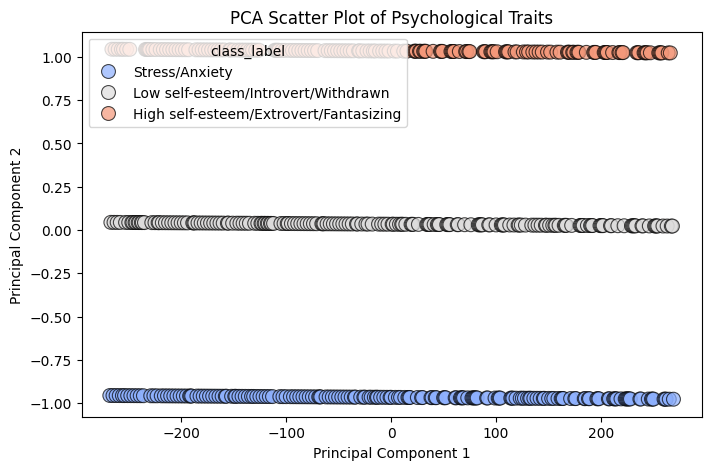

In [74]:
# Apply PCA for dimensionality reduction (2D)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['id', 'class']])

# Assign PCA results to DataFrame
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='pca_1', y='pca_2', hue='class_label', data=df, palette='coolwarm', s=100, alpha=0.7, edgecolor="black")
plt.title("PCA Scatter Plot of Psychological Traits")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


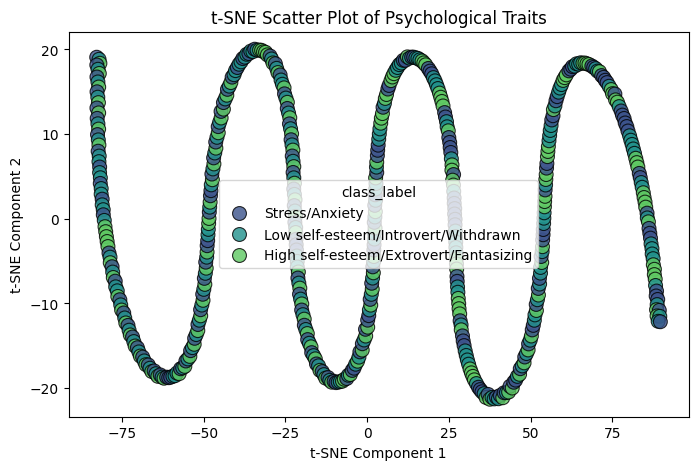

In [75]:

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
tsne_result = tsne.fit_transform(df[['id', 'class']])

# Assign t-SNE results to DataFrame
df['tsne_1'] = tsne_result[:, 0]
df['tsne_2'] = tsne_result[:, 1]

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='class_label', data=df, palette='viridis', s=100, alpha=0.8, edgecolor="black")
plt.title("t-SNE Scatter Plot of Psychological Traits")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


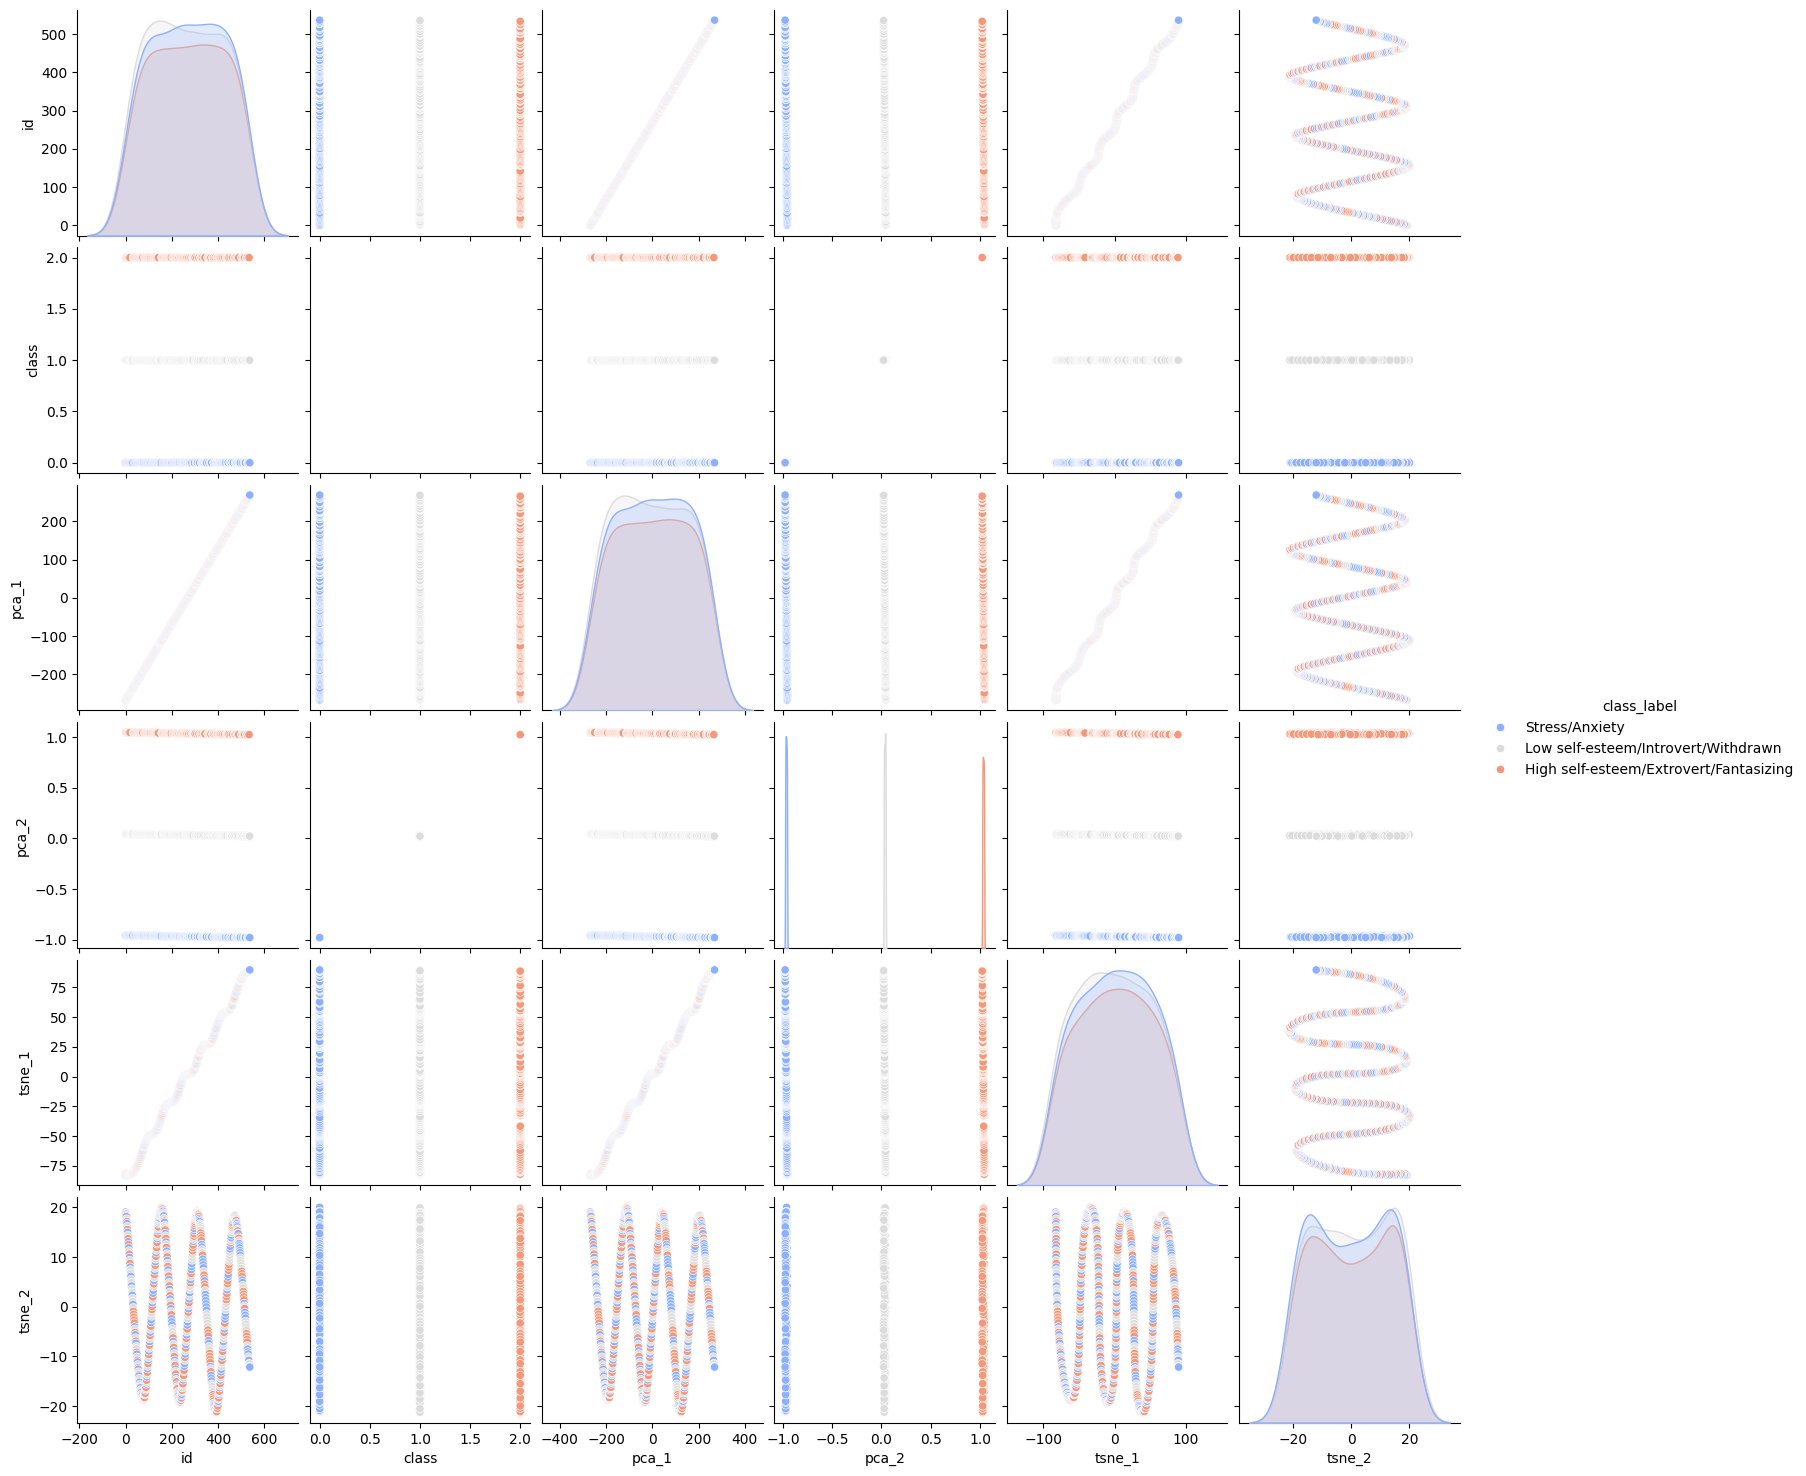

In [76]:
# Pairplot to visualize feature relationships
sns.pairplot(df, hue="class_label", diag_kind="kde", palette="coolwarm")
plt.show()


C:\Users\karti\AppData\Local\Temp\ipykernel_20708\2722973856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="class_label", y="id", data=df, palette="pastel")


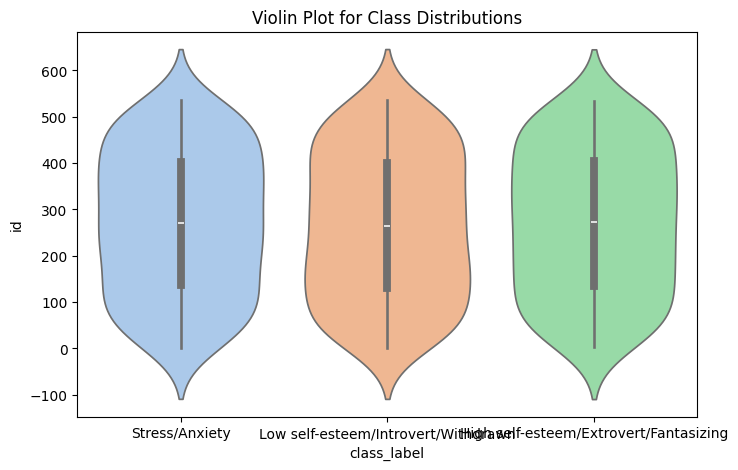

In [77]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="class_label", y="id", data=df, palette="pastel")
plt.title("Violin Plot for Class Distributions")
plt.show()


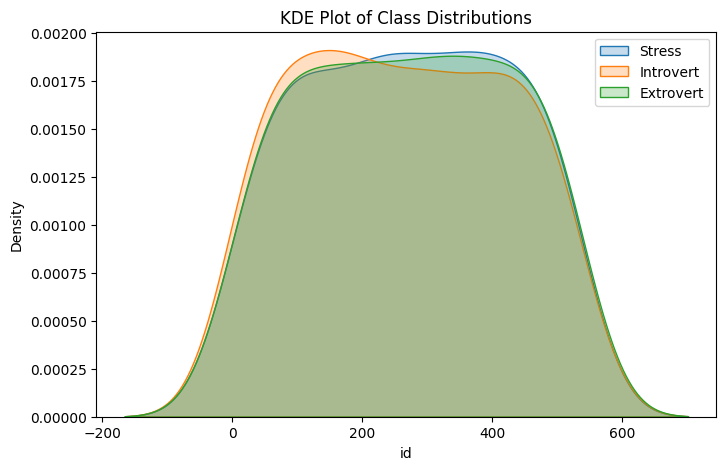

In [78]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["class"] == 0]["id"], label="Stress", fill=True)
sns.kdeplot(df[df["class"] == 1]["id"], label="Introvert", fill=True)
sns.kdeplot(df[df["class"] == 2]["id"], label="Extrovert", fill=True)
plt.title("KDE Plot of Class Distributions")
plt.legend()
plt.show()


c:\Users\karti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\karti\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


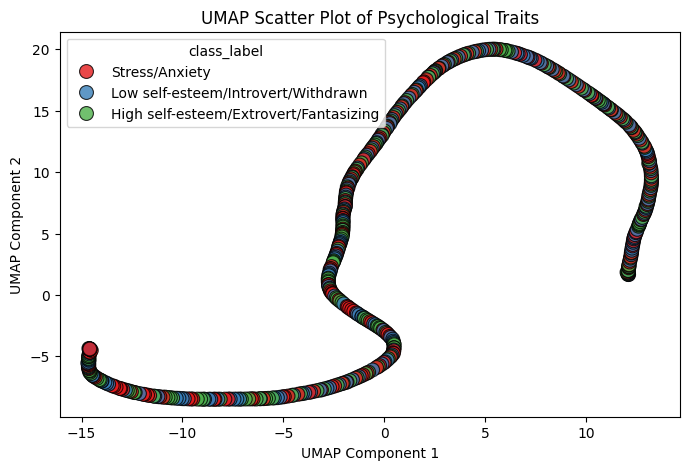

In [79]:
# Apply UMAP for dimensionality reduction
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(df[['id', 'class']])

# Assign UMAP results to DataFrame
df['umap_1'] = umap_result[:, 0]
df['umap_2'] = umap_result[:, 1]

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='umap_1', y='umap_2', hue='class_label', data=df, palette='Set1', s=100, alpha=0.8, edgecolor="black")
plt.title("UMAP Scatter Plot of Psychological Traits")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


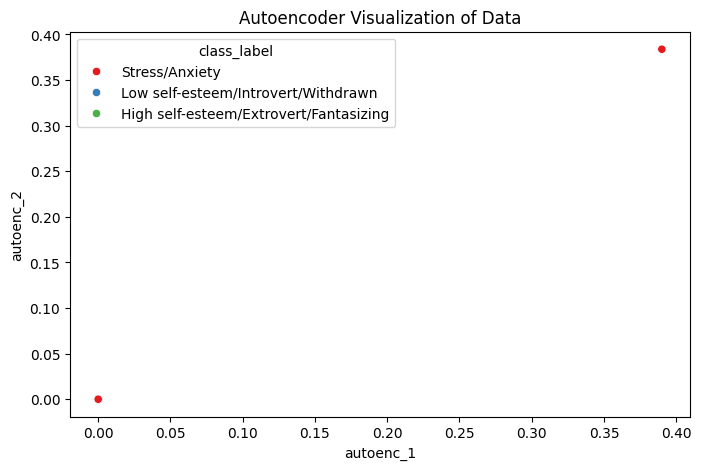

In [80]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define an autoencoder
input_dim = 2  # Since we only have id & class
encoding_dim = 2  # Low-dimension embedding

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# Compile & Train (for visualization only, NOT classification)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(df[['id', 'class']], df[['id', 'class']], epochs=50, batch_size=16, verbose=0)

# Extract learned embeddings
encoded_data = encoder.predict(df[['id', 'class']])

# Assign to DataFrame
df['autoenc_1'], df['autoenc_2'] = encoded_data[:, 0], encoded_data[:, 1]

# Plot learned representations
plt.figure(figsize=(8, 5))
sns.scatterplot(x='autoenc_1', y='autoenc_2', hue='class_label', data=df, palette='Set1')
plt.title("Autoencoder Visualization of Data")
plt.show()


In [96]:
def count_classes(dictClass, arr):
    """
    Redundant method that counts the occurrences of each class in the dataset
    Can be used to create weights if the class distribution is unbalanced
    :param dictClass: Dictionary that maps number to class labels
    :param arr: The array that contains the data
    :return: The number of occurrences for each class in the given array
    """
    unique, count = numpy.unique(arr, return_counts=True)
    print(dict(zip(dictClass.values(), count)))
    count = 1 / count
    count = count / sum(count)
    return count

In [83]:
# Match the image IDs to the ID values in the .csv file.
translation_dict = dict( zip([f'{id}.png' for id in data['id']], data['class']))

# Prepare each image to be passed as a Tensor product to the model.
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Prepare the data by matching it to its label and transforming it to a Tensor product.
housedata = DoodleDatasetSimple(r'D:\\COLLEGE_STUDIES\\SEM-6\\ML_NLP_project\\images\\house\\', data_transforms, translation_dict)


In [84]:
# 80% of the data for training.
train_len = int(housedata.__len__() * 0.8)
# 20% of the data for validation.
test_len = int(housedata.__len__() * 0.2 + 1)
# Split the data at a random point.
train_set, val_set = torch.utils.data.random_split(housedata, [train_len, test_len])
# Shuffle and load the labeled images in batches of 4 for training.
train_loader = DataLoader(train_set, batch_size=4, shuffle=True, num_workers=0, drop_last=True)
# Load the labeled images in batches of 4 for validation after training the model.
test_loader = DataLoader(val_set, batch_size=4, shuffle=False, num_workers=0, drop_last=True)


## Model Definition

In [85]:
class MultilabelClassifier(nn.Module):
    """
    Class that contains the layers for the model.
    Starting model ResNet-34, replace last layer with a Linear layer that outputs
    a single number, the label of the image.
    """
    def __init__(self, n_features):
        super().__init__()
        self.resnet = models.resnet34(pretrained=True)
        self.model_wo_fc = nn.Sequential(*(list(self.resnet.children())[:-1]))

        self.imageClass = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(in_features=512, out_features=n_features)
        )

    def forward(self, x):
        x = self.model_wo_fc(x)
        x = torch.flatten(x, 1)

        return {
            'class': self.imageClass(x)
        }
    



In [86]:
# Set the device to use as the GPU if there is compatible hardware
# Otherwise run the model on the cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultilabelClassifier(3).to(device)


c:\Users\karti\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\karti\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [87]:
def criterion(outputs, pictures):
    """
    Method used by the model as the criterion for training.
    Cross entropy loss used as the loss function
    :param outputs: Predicted labels by the model
    :param pictures: Actual labeled images from the dataset
    :return: The sum of the cross entropy loss function.
    """
    losses = 0

    for i, key in enumerate(outputs):
        loss_func = nn.CrossEntropyLoss()
        labelsTensor = pictures['class'].clone().detach()
        losses += loss_func(outputs[key], labelsTensor.long().to(device))

    return losses


In [88]:
def training(model, device, lr_rate, epochs, train_loader):
    """
    Method used by the model for training
    :param model: The model to train
    :param device: Which device to use for computation, GPU or CPU
    :param lr_rate: The learning rate used by the optimizing function
    :param epochs: How many epochs to train the model for
    :param train_loader: The loader that provides the labeled images in batches
    :return: An array containing the losses after each epoch
    """
    num_epochs = epochs
    losses = []
    checkpoint_losses = []

    optimizer = torch.optim.Adam(model.parameters(), lr=lr_rate)
    n_total_steps = len(train_loader)

    for epoch in range(num_epochs):
        for i, pictures in enumerate(train_loader):
            images = pictures['image'].to(device)

            output = model(images)

            loss = criterion(output, pictures)
            losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i + 1) % (int(n_total_steps / 1)) == 0:
                checkpoint_loss = torch.tensor(losses).mean().item()
                checkpoint_losses.append(checkpoint_loss)
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {checkpoint_loss:.4f}')

    # Snippet used to save the models for inferring during runtime.
    # model_save_path = r'D:\COLLEGE_STUDIES\SEM-6\ML_NLP_project\model\house\house_model_12.tar'
    # torch.save({
    #     'model_state_dict': model.state_dict(),
    #     'optimizer_state_dict': optimizer.state_dict(),
    #     'loss': checkpoint_losses,
    # }, model_save_path)



    return checkpoint_losses


In [89]:
# Call the method to train the model
checkpoint_losses = training(model, device, 0.0001, 1, train_loader)


Epoch [1/1], Step [107/107], Loss: 0.4339


In [90]:
import torch

def validation(model, dataloader, device):
    """
    Validates the model after training.

    :param model: The trained model.
    :param dataloader: Dataloader providing labeled images in batches.
    :param device: Device (CPU or GPU) for computation.
    :return: Model accuracy in percentage.
    """
    model.eval()  # Set model to evaluation mode
    n_correct = 0
    n_samples = 0

    with torch.no_grad():
        for pictures in dataloader:
            images = pictures['image'].to(device)
            labels = pictures['class'].to(device)

            outputs = model(images)['class']  # Extract class predictions
            _, predicted = torch.max(outputs, 1)  # Get predicted class indices

            n_correct += (predicted == labels).sum().item()
            n_samples += labels.size(0)

    acc = 100.0 * n_correct / n_samples if n_samples > 0 else 0.0  # Avoid division by zero
    print(f"Validation Accuracy: {acc:.2f}%")
    
    return acc


In [91]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Ensure correct device
model.to(device)  # Move model to device

# Call the validation function
accuracy = validation(model, test_loader, device)

Validation Accuracy: 98.15%


In [ ]:
y_true = []  # Store actual labels
y_pred = []  # Store model predictions

model.eval()
with torch.no_grad():
    for pictures in test_loader:
        images = pictures['image'].to(device)
        labels = pictures['class'].to(device)

        outputs = model(images)['class']  # Extract class predictions
        _, predicted = torch.max(outputs, 1)  # Convert logits to class indices

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="weighted")


print("Sample y_true:", y_true[:10])  # First 10 actual labels
print("Sample y_pred:", y_pred[:10])  # First 10 predicted labels

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Sample y_true: [np.int64(2), np.int64(0), np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(2), np.int64(2)]
Sample y_pred: [np.int64(2), np.int64(2), np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(2), np.int64(2)]
Accuracy: 0.9815
Precision: 0.9825
Recall: 0.9815
F1 Score: 0.9816
